## Dragon real estate


In [1]:
import pandas as pd

In [2]:
housing=pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    int64  
 4   NOX      505 non-null    float64
 5   RM       497 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    int64  
 9   TAX      505 non-null    int64  
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.3 KB


In [5]:
housing['CHAS'].value_counts()

0    470
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,497.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.280974,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.701076,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.884000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.619000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

In [9]:
#housing.hist(bins=50, figsize=(20,15))

## Train-test splitting

In [10]:
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:] 
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
train_set, test_set =split_train_test(housing, 0.2)

[173 274 490  72 305  76 476 140 470 499 218   9 480  78 322 312 124 384
 195 447 271 278  30 500 420 444  79 318 210 496 172 453 374 358 494 153
   2 335 208  73 495 451 204  68  90 299  33  70 469   0  11 281  22 101
 268 484 441 290  84 245  63  55 229  18 410 209 394  82  39 455  46 412
 314 354  77 397 104 203 380 488  69 407 255 391 311 234 473 323  93 137
 176 336 131 502 364 132 331 411 503 349  86  75 442  15 325 388  19 324
 334  56 338 408 333 181 227 426 180  25 329 238 244 250 417 117  42 321
 346 182 155 280 126 448  31 113 148 429 400  57 194  24  17 297  66 211
 403  94 154 440  23 225 432 446   5 116  45  16 467 361   3 294 185  60
 110 320 265  29 262 477  26   7 457 108  37 157 471 118 114 175 192 272
 144 489 382 355 277 220 449 141 368  67 360 168 498 378 365 193 249 109
 433 145  92 152 222 409  83 248 165 163 199 231  74 310 454 253 119 284
 301 482 356 402 228 261 237 437 475  36 196 139 367 247 287 377  59 111
  89 266   6 456 347 340 158 150 177 396 184 317  1

In [12]:
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 404
Rows in test set: 101



In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_set, test_set=train_test_split(housing,test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 404
Rows in test set: 101



In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split =StratifiedShuffleSplit(n_splits = 1, test_size = 0.2 , random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set =housing.loc[train_index]
    strat_test_set =housing.loc[test_index]


In [16]:
strat_test_set['CHAS'].value_counts()

0    94
1     7
Name: CHAS, dtype: int64

In [17]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [18]:
housing=strat_train_set.copy()

# # looking for correlation


In [19]:
corr_matrix=housing.corr()

In [20]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.657453
B          0.344609
ZN         0.329206
DIS        0.231680
CHAS       0.215042
RAD       -0.362619
AGE       -0.378913
CRIM      -0.397993
NOX       -0.421815
TAX       -0.441617
INDUS     -0.448303
PTRATIO   -0.486045
LSTAT     -0.739129
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1274CFB8>,
      dtype=object)

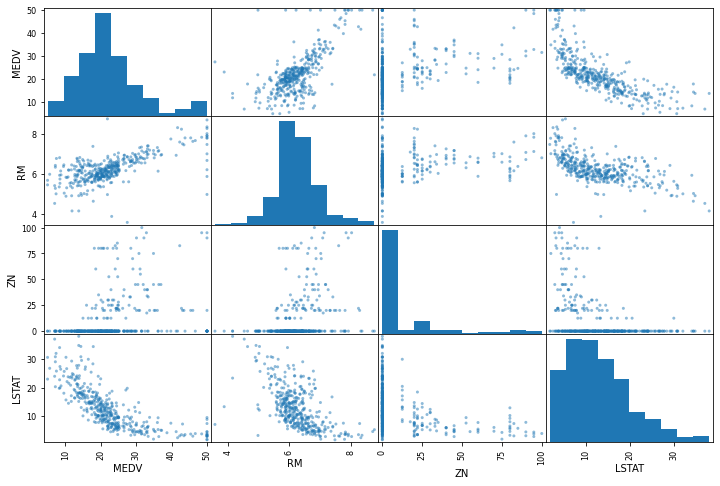

In [21]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize = (12,8))


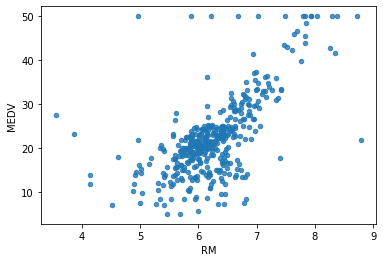

In [22]:
housing.plot(kind="scatter", x="RM" , y="MEDV", alpha=0.8)

## trying out attributes combination

In [23]:
housing["TAXRM"]=housing['TAX']/housing['RM']

In [24]:
housing["TAXRM"]

254     53.607897
348     48.277850
476    125.565611
321     47.508691
326     47.180667
          ...    
154     65.507152
423    119.676550
98      37.216828
455    111.445783
215     46.875000
Name: TAXRM, Length: 404, dtype: float64

In [25]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.03548,80.0,3.64,0,0.392,5.876,19.1,9.2203,1,315,16.4,395.18,9.25,20.9,53.607897
348,0.02899,40.0,1.25,0,0.429,6.939,34.5,8.7921,1,335,19.7,389.85,5.89,26.6,48.277850
476,15.02340,0.0,18.10,0,0.614,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0,125.565611
321,0.35114,0.0,7.38,0,0.493,6.041,49.9,4.7211,5,287,19.6,396.90,7.70,20.4,47.508691
326,0.24103,0.0,7.38,0,0.493,6.083,43.7,5.4159,5,287,19.6,396.90,12.79,22.2,47.180667


In [26]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.657453
B          0.344609
ZN         0.329206
DIS        0.231680
CHAS       0.215042
RAD       -0.362619
AGE       -0.378913
CRIM      -0.397993
NOX       -0.421815
TAX       -0.441617
INDUS     -0.448303
PTRATIO   -0.486045
TAXRM     -0.506173
LSTAT     -0.739129
Name: MEDV, dtype: float64

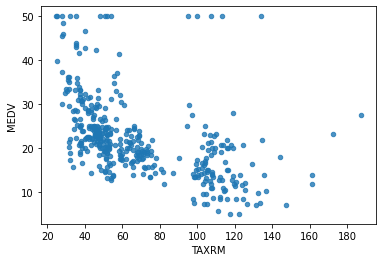

In [27]:
housing.plot(kind="scatter", x="TAXRM" , y="MEDV", alpha=0.8)

In [28]:
housing=strat_train_set.drop("MEDV",axis=1)
housing_labels=strat_train_set["MEDV"].copy()

# # MISSING ATTRIBUTES

In [29]:
#to take care of missing attributes there are three options:
    #get rid of missing data points
    #get rid of whole data points
    #set the value to some(0.mean,median)

In [30]:
a= housing.dropna(subset=["RM"]) #OPTION 1
a.shape

(399, 13)

In [31]:
housing.drop("RM",axis=1).shape #option2
#rm column got deleted but original dataframe will remain unchanged

(404, 12)

In [32]:
median=housing["RM"].median()

In [33]:
median


6.182

In [34]:
housing["RM"].fillna(median)
#original dataframe will remain unchanged

254    5.876
348    6.939
476    5.304
321    6.041
326    6.083
       ...  
154    6.152
423    5.565
98     7.416
455    5.976
215    5.888
Name: RM, Length: 404, dtype: float64

In [35]:
housing.shape

(404, 13)

In [36]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [37]:
imputer.statistics_.shape

(13,)

In [38]:
x=imputer.transform(housing)

In [39]:
housing_tr = pd.DataFrame(x,columns=housing.columns)

In [40]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.680733,10.189356,11.305965,0.069307,0.557274,6.247913,68.548020,3.778549,9.702970,411.428218,18.502723,353.522649,12.833292
std,8.249705,21.930822,6.817698,0.254290,0.116503,0.680839,28.433028,2.125958,8.754489,168.237476,2.117437,95.111003,7.199418
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.090060,0.000000,5.190000,0.000000,0.452000,5.875000,44.850000,2.070275,4.000000,284.000000,17.400000,374.237500,7.362500
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.182000,77.500000,3.167500,5.000000,336.000000,19.050000,390.940000,11.570000
75%,3.694070,3.125000,18.100000,0.000000,0.625750,6.593500,94.600000,5.104475,24.000000,666.000000,20.200000,396.157500,16.977500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


# # scikit-learn design


primarly three types of objects
1.estimators:it estimates some perameter based on the datasets eg imputer
it has fir and transform method
fits the method and calculates the internal paremeters
2.transformer:transform method takes inputs and return output based on the learning from fit().it also had a conivence function called fit_transform() which fits and then transform.
3.predictors:linear regression model is the example of predictors.fit() and predicts() are the two common examples.it also give score function which will evalute the predictions.

# # creating a pipeline

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    #     ..... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])


In [42]:
housing_num_tr = my_pipeline.fit_transform(housing_tr)

In [43]:
housing_num_tr.shape

(404, 13)

# # selecting a desired model for dragon real estates

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
#model=LinearRegression()
#model=DecisionTreeRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [45]:
some_data = housing.iloc[:5]

In [46]:
some_labels=housing_labels.iloc[:5]

In [47]:
prepared_data=my_pipeline.transform(some_data)

In [48]:
model.predict(prepared_data)

array([20.717, 27.287, 12.377, 21.039, 22.168])

In [49]:
list(some_labels)

[20.9, 26.6, 12.0, 20.4, 22.2]

# # evaluting the model

In [50]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
lin_mse= mean_squared_error(housing_labels,housing_predictions)
lin_rmse=np.sqrt(lin_mse)

In [51]:
lin_rmse


1.1467671013128469

# # using better evaluation technique-Cross validation

In [52]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [53]:
rmse_scores

array([3.72290619, 2.39869125, 5.08465377, 2.64610574, 2.84592178,
       2.51611197, 2.69762188, 2.97029213, 2.02584093, 4.1050475 ])

In [54]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("standard devation:",scores.std())

In [55]:
print_scores(rmse_scores)

Scores: [3.72290619 2.39869125 5.08465377 2.64610574 2.84592178 2.51611197
 2.69762188 2.97029213 2.02584093 4.1050475 ]
Mean: 3.101319313193791
standard devation: 0.8816377207906575


# # SAVING THE MODEL


In [56]:
from joblib import dump, load
dump(model, 'Dragon.joblib') 

['Dragon.joblib']

TESSTING THE MODEL ON TEST DATA


In [60]:
X_test = strat_test_set.drop("MEDV",axis=1)
Y_test=strat_test_set["MEDV"].copy()
X_test_prepared=my_pipeline.transform(X_test)
final_predictions=model.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
#print(final_predictions,list(Y_test))

[23.349 22.122 46.666 32.776 44.661 34.123 20.911 23.435 32.742 20.038
 19.308 29.686 21.967 33.149 21.141 20.788 12.475 21.14  28.534 19.633
 19.887 45.928 12.021 18.83  25.862 33.661 16.429 15.766  6.631 20.243
 23.602 23.231 18.33  15.154 20.72  18.723 22.952 17.456 43.965 16.938
 21.527 18.874 19.146 18.597 33.214  8.349 24.947 14.431 21.131 21.317
 46.075 24.619 15.082 21.61  19.864 46.512 26.127 19.838 34.643 10.492
 23.673 35.398 33.583 23.639 14.456 20.87  20.852 15.794 28.101 25.317
 23.227 32.271 19.166 31.851 10.912 20.014 42.586 19.583 19.788 14.204
 41.663  9.131 35.533 22.657 27.864 16.091 23.14  22.143 20.513 16.019
 26.361  9.983 32.437 12.807 25.769 20.271 33.5   13.835 21.079 21.605
 20.699] [24.6, 22.0, 44.8, 23.6, 48.8, 36.5, 19.7, 23.1, 34.6, 21.5, 23.1, 15.0, 23.0, 34.9, 18.5, 10.4, 10.2, 18.9, 23.9, 19.3, 19.4, 48.3, 10.9, 19.6, 27.5, 37.3, 16.1, 15.2, 10.5, 21.4, 23.2, 20.7, 21.7, 13.0, 22.3, 19.6, 21.2, 18.1, 50.0, 23.7, 22.6, 20.5, 18.9, 19.5, 32.7, 8.8, 29.1,

In [59]:
final_rmse

3.4762938342122607

In [62]:
prepared_data[0]

array([-0.44241248,  3.18716752, -1.12581552, -0.27288841, -1.42038605,
       -0.54693502, -1.7412613 ,  2.56284386, -0.99534776, -0.57387797,
       -0.99428207,  0.43852974, -0.49833679])

# # using the model

In [63]:
from joblib import dump,load
import numpy as np
model=load('Dragon.joblib')

In [64]:
features=np.array([[-0.44241248,  7.18716752, -1.12581552, -0.27288841, -1.42038605,
       -0.54693502, -1.7412613 ,  2.56284386, -0.99534776, -0.57387797,
       -0.99428207,  0.43852974, -0.49833679]])
model.predict(features)

array([20.717])